## HW 1: Sinusoids, Functions, Additive Synthesis (15 points)
For each markdown cell, add a cell (or cells) of code below. 
Reminders:
* This is an individual assignment. 
* If you use GenAI tools to assist you with your homework, remember to fill out the GenAI Usage Statement at the bottom of the notebook. Even if you use GenAI, you should not be directly copying the code.
* You may only use functions/packages we have discussed in class

### Question 1 - Sinusoids (3 points)
Define the function, **genSine(f, ...)** that construct a sinusoid at frequency `f`.
The arguments should include:  
* amplitude, with default value of 1 (float)
* sample rate, with default value of 44.1kHz (float)
* time in seconds, with default value of 1 (float)
* phase offset, with default value of 0 (float)
    
and will return the numpy array containing the sinusoidal waveform.

Your function must check for appropriate input and handle any errors.
    

In [51]:
import numpy as np
from IPython.display import Audio
from scipy.io.wavfile import read, write
from matplotlib import pyplot as plt

In [60]:
import numpy as np

def genSine(f, a=1.0, fs=44100.1, t=1.0, f0=0.0):
        if not isinstance(f, (float)) or f <= 0:
                print("frequency input must be a positive float")
                return None
        if not isinstance(a, (float)):
                print("amplitude input must be a float")
                return None
        if not isinstance(fs, (float)) or fs <= 0:
                print("sample rate input must be a float")
                return None
        if not isinstance(t, (float)) or t <= 0 :
                print("time input must be a positive float")
                return None
        if not isinstance(f0, (float)):
                print("phase offset input must be a float")
                return None

        time = np.arange(0, t, 1/fs)
        sine = a * np.sin(2 * np.pi * f * time + f0)
        return sine


### Question 2 - Classical Waveform (5 points)
Define a function, **genWave(freq, t, numHarms=None, A=1, phi=0, fs=44100)**, that will create one of the fundamental waveforms (saw, triangle, or square) built from the combination of sinusoids at integer multiples of a fundamental frequency.  The arguments passed will be as follows:

* freq will be the frequency in Hz (int or float).
* t will be the length of time in seconds (int or float).
* numHarms will be the number of harmonics used. If no value is given (NoneType), you should create the maximum harmonics possible given the sampling rate

The function should return a numpy array. **You may not use existing waveform functions such as those in the `scipy` library.**

Your function must check for appropriate input and handle any errors.

Try to make your function as efficient as you can, but we will not take points off for a long run time. Be mindful by using NumPy functions rather than direct iteration.

*Hint: your function should use your genSine function

**Bonus: Expand this function to create any of the classical waveforms with a new argument "type" specifying which to build.

In [61]:
from types import NoneType

def genWave(freq, t, numHarms=None, A=1.0, phi=0.0, fs=44100.0, type="saw"): 
    if not isinstance(freq, (int, float)) or freq <= 0:
        print("frequency input must be a positive number")
        return None
    if not isinstance(t, (int, float)) or t <= 0:
        print("time input must be a positive number")
        return None
    if not isinstance(A, (int, float)):
        print("amplitude input must be a number")
        return None
    if not isinstance(phi, (int, float)):
        print("phase offset input must be a number")
        return None
    if not isinstance(numHarms, (int, NoneType)):
        print("numHarms input must be either an int or None")
        return None
    if not isinstance(fs, (int, float)) or fs <= 0:
        print("sample rate input input must be a positive number ")
        return None
    if type not in ("saw", "square", "triangle"):
        print("wave type input must be either 'saw', 'square', or 'triangle'")
        return None


    nyq = fs/ 2
    maxHarm = int(nyq // freq)
    if numHarms is None or numHarms > maxHarm:
        numHarms = maxHarm

    time = np.arange(0, t, 1/fs)
    wave = np.zeros_like(time)

    for n in range(1, numHarms+1):
        if type == "square":
            if n%2 == 1:
                amp = 1/n
                wave += genSine(float(n*freq), float(amp), float(fs), float(t), float(phi))

        elif type == "saw":
            amp= 1/ n
            wave += genSine(float(n*freq), float(amp), float(fs), float(t), float(phi))

        elif type == "triangle":
            if n % 2 == 1:
                amp = ((-1) ** ((n-1) //2))/ (n**2)
                wave += genSine(float(n * freq),float(amp) , float(fs),float(t), float(phi))

    wave /= np.max(np.abs(wave))
    wave *= A
    return wave


### Question 3 - Arpeggio (4 points)

Define the function arpegiateFreq(freq, dur), that will create a major scale arpeggio of a given frequency for a given length using your genWave() function. The arguments passed will be as follows:
* freq will be the starting/fundamental frequency in Hz (int or float)
* dur will be the length of time in seconds (int or float)

Reminder: a major scale arpeggio is built from the root, major third, and perfect 5th. You should divide the duration evenly amongst the three notes. 

The function should return a numpy array.

*Hint: your function will use the function(s) you just wrote*

Your function must check for appropriate input and handle any errors

**Bonus: Create a new function called arpegiateNote(scale, dur). Instead of the second input being frequency in Hz, the function should receive a note name like 'C'. You will need to convert this note to frequency. If you want to go the extra mile, make it case sensitive, such that an uppercase 'C' yields a C major arpeggio and lowercase 'c' yields a c minor arpeggio.

In [62]:
def arpegiateFreq(freq, dur) : 
    if not isinstance(freq, (int, float)) or freq <= 0:
        print("freq must be a positive number")
        return None
    if not isinstance(dur, (int, float)) or dur <= 0:
        print("dur must be a positive number")
        return None
    
    arp =  np.concatenate((genWave(freq, dur/3), genWave(freq*5/4, dur/3), genWave(freq*3/2, dur/3)))
    return arp
    


## Error handling tips and edge cases
What should happen if the frequency inputs to our functions would generate frequncies above Nyquist?

What should happen if our time inputs are negative? Or are 0?

What should happen if our frequencies are negative? Or are 0?

You should account for actual coding errors and errors that conceptually do not make sense.

### Section 4 - Using functions and graphing (3 points)
Create a 2 second F major arpeggio in an array named 'myArp'. Play back your audio.

In [65]:
myArp = arpegiateFreq(440.0, 2.0)
Audio(myArp, rate = 44100.0)

Remove every 4th sample of 'myArp', save as a new array, 'skipped, and play back your audio. What happened to the audio?

In [ ]:
skipped = myArp[::4] 
Audio(skipped, rate=44100)
## faster and pitched up

Create a 2 Bb major arpeggio in an array named 'myArp2'. Play back your audio

In [67]:
arp1 = arpegiateFreq(466.16, 1.0)
arp2 = arpegiateFreq(466.16 * 2, 1.0) 

myArp2 = np.concatenate((arp1, arp2))

Audio(myArp2, rate=44100)

Reverse 'myArp2' and save as a new array, 'reverse'. Play back your audio

In [69]:
reverse = myArp2[::-1]
Audio(reverse, rate = 44100)

Graph your 4 arrays on top of one another. Make sure to label the axis and plot against time. 

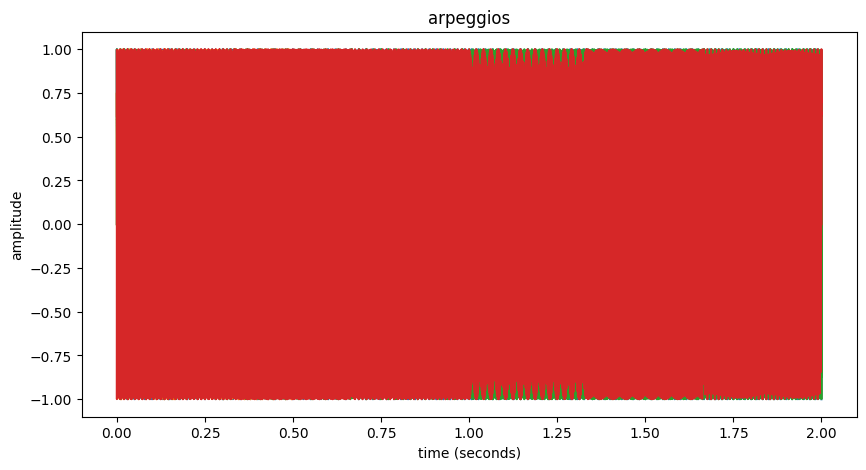

In [75]:
t_arp = np.arange(len(myArp))/44100
t_skip = np.arange(len(skipped)) /44100
t_arp2 = np.arange(len(myArp2))/44100
t_reverse = np.arange(len(reverse)) /44100

plt.figure(figsize=(10, 5))
plt.plot(t_arp, myArp)
plt.plot(t_skip,skipped)
plt.plot(t_arp2, myArp2)
plt.plot(t_reverse, reverse)
plt.title("arpeggios")
plt.xlabel("time (seconds)")
plt.ylabel("amplitude")

plt.show()

Create another graph, but this time only plot the first "note" of each array

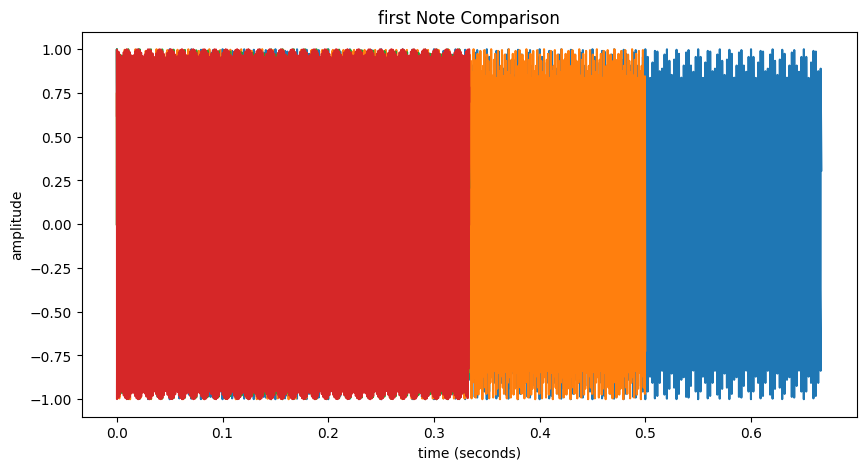

In [77]:
firstnotesamples_myArp   = int((2/3) * 44100)
firstnotesamples_myArp2  = int((2/6) *44100)
firstnotesamples_reverse = firstnotesamples_myArp2
firstnotesamples_skipped = int((2/3) *44100 * 3/4)

firstnote_myArp   = myArp[:firstnotesamples_myArp]
firstnote_skipped = skipped[:firstnotesamples_skipped]
firstnote_myArp2  = myArp2[:firstnotesamples_myArp2]
firstnote_reverse = reverse[:firstnotesamples_reverse]

t_myArp = np.arange(len(firstnote_myArp)) / 44100
t_skip= np.arange(len(firstnote_skipped)) / 44100
t_myArp2  = np.arange(len(firstnote_myArp2)) /44100
t_reverse = np.arange(len(firstnote_reverse)) /44100

plt.figure(figsize=(10, 5))
plt.plot(t_myArp, firstnote_myArp)
plt.plot(t_skip, firstnote_skipped)
plt.plot(t_myArp2, firstnote_myArp2)
plt.plot(t_reverse, firstnote_reverse)
plt.title("first Note Comparison")
plt.xlabel("time (seconds)")
plt.ylabel("amplitude")

plt.show()


### GenAI Usage Statement (if applicable)

I used ChatGPT mostly for python syntax help, since I've been coding a lot in Java recently. 

One example is the line amp = ((-1) ** ((n-1) //2))/ (n**2), where I needed help figuring out the best way to format the math. 

I also used it for help with all of the plotting syntax. 

